# Apply pandas, Group and Merge data

# Manipulating DataFrame

In [20]:
import pandas as pd

In [21]:
df=pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                 {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                index=['Store 1','Store 1','Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


In [22]:
# no. of input that we provide is equal to the row number...
df['Date']=['dec-1','jan 1','mid-may']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,dec-1
Store 1,Kevyn,Kitty Litter,2.5,jan 1
Store 2,Filip,Spoon,5.0,mid-may


In [23]:
# Scalar value 

df['Delivery']=True

df

,Name,Item Purchased,Cost,Date,Delivery
Store 1,Chris,Sponge,22.5,dec-1,True
Store 1,Kevyn,Kitty Litter,2.5,jan 1,True
Store 2,Filip,Spoon,5.0,mid-may,True


In [24]:
df['Feedback']=['Positive',None,'Negative']

In [25]:
df

,Name,Item Purchased,Cost,Date,Delivery,Feedback
Store 1,Chris,Sponge,22.5,dec-1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,jan 1,True,None
Store 2,Filip,Spoon,5.0,mid-may,True,Negative


In [26]:
adf=df.reset_index()


In [27]:
adf['Date']=pd.Series({0:'Dec-1',2:'Mid-may'})
adf

# in this case there is no need to remember about thoise values that we don't know,
# we simply leave it here...

,index,Name,Item Purchased,Cost,Date,Delivery,Feedback
0,Store 1,Chris,Sponge,22.5,Dec-1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,Mid-may,True,Negative


In [28]:
# NOW MERGING 2 DATAFRAMES

In [29]:
staff_df=pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])

staff_df=staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])

student_df=student_df.set_index('Name')

print(staff_df.head())
print()
print(student_df.head())


                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [30]:
pd.merge(staff_df,student_df,how='outer',left_index=True,right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [31]:
 pd.merge(staff_df,student_df,how='inner',left_index=True,right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [32]:
pd.merge(staff_df,student_df,how='left',left_index=True,right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [33]:
pd.merge(staff_df,student_df,how='right',left_index=True,right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


In [34]:
staff_df=staff_df.reset_index()
student_df=student_df.reset_index()
pd.merge(staff_df,student_df,how='left',left_on='Name',right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [35]:
# In case we have conflicts between the data...

staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])


In [36]:
pd.merge(staff_df,student_df,how='left',left_on='Name',right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [37]:
# multi indexing and multi columns

In [40]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
print(staff_df)
print(student_df)

  First Name   Last Name            Role
0      Kelly  Desjardins  Director of HR
1      Sally      Brooks  Course liasion
2      James       Wilde          Grader
  First Name Last Name       School
0      James   Hammond     Business
1       Mike     Smith          Law
2      Sally    Brooks  Engineering


In [41]:
pd.merge(staff_df,student_df,how='inner',left_on=['First Name','Last Name'],right_on=['First Name','Last Name'])


,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# making code "pandorable" now

In [47]:
df=pd.read_csv(r"E:\Mohit\Datasets\census.csv")

In [48]:
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [54]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010':'Estimate Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimate Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                 
Alabama Autauga County           54571.0             54571.0          54660.0   
        Baldwin County          182265.0            182265.0         183193.0   
        Barbour County           27457.0             27457.0          27341.0   
        Bibb County              22915.0             22919.0          22861.0   
        Blount County            57322.0             57322.0          57373.0   
...                                  ...                 ...              ...   
Wyoming Sweetwater County        43806.0             43806.0          43593.0   
        Teton County             21294.0             21294.0          21297.0   
        Uinta County             21118.0             21118.0          21102.0   
        Washakie County           8533.0              8533.0           8545.0   
        Weston County             7208.0              7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
      

In [55]:
import numpy as np

In [56]:
def min_max(row):
    data=row[['POPESTIMATE2010',
             'POPESTIMATE2011',
             'POPESTIMATE2012',
             'POPESTIMATE2013',
             'POPESTIMATE2014',
             'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max':np.max(data)})

In [57]:
df.apply(min_max,axis=1)

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


In [58]:
def min_max(row):
    data=row[['POPESTIMATE2010',
             'POPESTIMATE2011',
             'POPESTIMATE2012',
             'POPESTIMATE2013',
             'POPESTIMATE2014',
             'POPESTIMATE2015']]
    row['max']=np.max(data)
    row['min']=np.min(data)
    return row

df.apply(min_max,axis=1)

# axis=0 is used for the row-wise computation
# axis=1 is used for the column-wise computation


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,43593
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,21297
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,20822
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8316


In [59]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [60]:
rows=['POPESTIMATE2010',
     'POPESTIMATE2011',
     'POPESTIMATE2012',
     'POPESTIMATE2013',
     'POPESTIMATE2014',
     'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]),axis=1)

0       4858979
1         55347
2        203709
3         27341
4         22861
         ...   
3188      45162
3189      23125
3190      21102
3191       8545
3192       7234
Length: 3193, dtype: int64

# group by

In [65]:
df=pd.read_csv(r"E:\Mohit\Datasets\census.csv")
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [66]:
df=df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [81]:
#%%timeit -n 5
#for group,frame in df.groupby('STNAME'):
#    avg=np.average(frame['CENSUS2010POP'])
#    print('Countries in state '+group+' have an average population of '+str(avg))

In [73]:
print(df.groupby('STNAME'))

In [74]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [75]:
df.set_index('STNAME')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,50,4,8,56,37,Sweetwater County,43806,43806,43593,44041,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
Wyoming,50,4,8,56,39,Teton County,21294,21294,21297,21482,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
Wyoming,50,4,8,56,41,Uinta County,21118,21118,21102,20912,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351


# split apply combine

In [91]:
df=pd.read_csv(r'E:\Mohit\Datasets\census.csv')

In [92]:
df=df[df['SUMLEV']==50]

In [93]:
df.groupby('STNAME').agg({'CENSUS2010POP':np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [94]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2010']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))


<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


<ipython-input-94-fbcebb4a8ca5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2010']))


# Scales

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])

In [4]:
df

,0
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [5]:
df.rename(columns={0:'Grades'},inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [10]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [15]:
from pandas.api.types import CategoricalDtype


In [20]:
df['Grades']>'C'

excellent    False
excellent    False
excellent    False
good         False
good         False
good         False
ok            True
ok           False
ok            True
poor          True
poor          True
Name: Grades, dtype: bool

In [22]:
import numpy as np

# Pivot tables ...
helps to see the relation between 2 table at a glance

In [1]:
import pandas as pd

In [6]:
import os
path=os.getcwd()
path

'C:\\Users\\Rohit\\AppData\\Local\\Programs\\Python\\Python38-32'

In [13]:
df=pd.read_csv(r'E:\Mohit\Datasets\cars.csv')

In [14]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [15]:
import numpy as np

In [16]:
df.pivot_table(values='(kW)',index='YEAR',columns='Make',aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [17]:
df.pivot_table(values='(kW)',index='YEAR',columns='Make',aggfunc=[np.mean,np.min],margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# time series and date functionality

### Timestamp, Period,

In [19]:
pd.Timestamp('05/08/2020 03:20PM')

Timestamp('2020-05-08 15:20:00')

In [23]:
pd.Period('05/2020')

Period('2020-05', 'M')

In [21]:
pd.Period('3/5/2020')

Period('2020-03-05', 'D')

In [26]:
t1=pd.Series(list('abc'),[pd.Timestamp('2020-08-01'),pd.Timestamp('2020-08-02'),pd.Timestamp('2020-08-03')])
t1

2020-08-01    a
2020-08-02    b
2020-08-03    c
dtype: object

In [27]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
t2=pd.Series(list('def'),[pd.Period('2020-01'),pd.Period('2020-02'),pd.Period('2020-03')])
t2

2020-01    d
2020-02    e
2020-03    f
Freq: M, dtype: object

In [31]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

In [34]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,12,47
"Aug 29, 2014",65,87
2015-06-26,94,11
7/12/16,92,87


In [36]:
ts3.index=pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,12,47
2014-08-29,65,87
2015-06-26,94,11
2016-07-12,92,87


In [41]:
pd.to_datetime('21.2.20')

Timestamp('2020-02-21 00:00:00')

In [43]:
pd.Timestamp('05-08-2020')-pd.Timestamp('27-12-1998')

Timedelta('7803 days 00:00:00')

In [44]:
pd.Timestamp('05-08-2020')+pd.Timedelta('1D 3H')

Timestamp('2020-05-09 03:00:00')

In [49]:
np.random.randint(0,100,(10,2));

<AxesSubplot:>

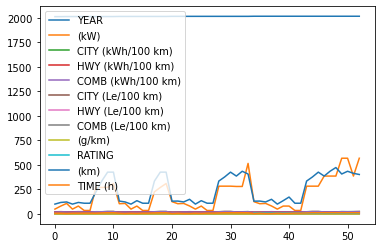

In [54]:
import matplotlib.pyplot as plt

%matplotlib inline 

df.plot()